## FROM SCRATCH

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mean_01 = np.array([0.0,0.0])
cov_01 = np.array([[1.0,0.1],[0.1,1.1]])

mean_02 = np.array([6.0,6.0])
cov_02 = np.array([[1.0,0.1],[1.0,1.1]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


/home/sumit/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


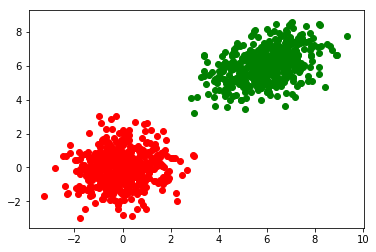

In [3]:
plt.scatter(dist_01[:,0],dist_01[:,1],c='red')
plt.scatter(dist_02[:,0],dist_02[:,1],c='green')

In [4]:
data = np.vstack((dist_01,dist_02))
np.random.shuffle(data)
data[:10]

array([[ 6.48135875,  5.98320592],
       [-1.78263995, -0.08851923],
       [ 6.82598259,  5.73119167],
       [ 6.50949646,  5.98660928],
       [-0.71560442, -0.04788645],
       [ 1.25358769,  1.11416625],
       [ 6.14579483,  6.15163311],
       [ 0.30837751, -0.20484406],
       [ 5.11913932,  6.37723544],
       [-1.61918959, -0.10775715]])

In [5]:
#KMeans Clustering definition
k = 4
num_iters = 5
colors = ['red','green','blue','yellow']
clusters = {}

for cx in range(k):
    cluster_vals = {
        'centroid': np.random.uniform(low=data.min(),high=data.max(),size=(data.shape[1])),
        'points': [],
        'color': colors[cx],
        'history': []
    }
    clusters[cx] = cluster_vals

In [6]:
def distance(p1,p2):
    return np.sqrt(((p1-p2)**2).sum())

distance(np.array([0.0,0.0]),np.array([1.0,1.0]))

1.4142135623730951

Steps in each iteratin:

1.Assign points to cluster
  --compute distance
  --find argmin
2.Update centroid location
  --compute Mean
3.Initialise for next iteration
  --Add to history
  --Empty List

In [7]:
for cx in range(k):
    print(cx,clusters[cx])

0 {'points': [], 'color': 'red', 'history': [], 'centroid': array([ 8.67601124, -1.5562627 ])}
1 {'points': [], 'color': 'green', 'history': [], 'centroid': array([9.05479958, 0.88689381])}
2 {'points': [], 'color': 'blue', 'history': [], 'centroid': array([-2.27087911,  3.48115767])}
3 {'points': [], 'color': 'yellow', 'history': [], 'centroid': array([8.83036442, 5.60937049])}


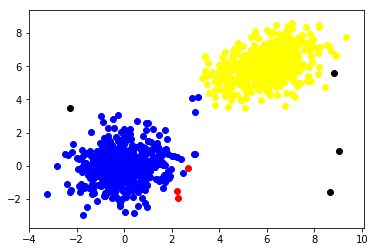

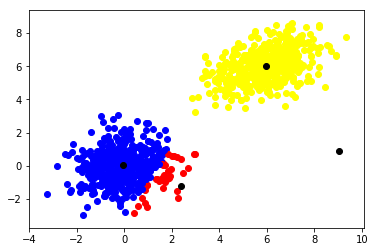

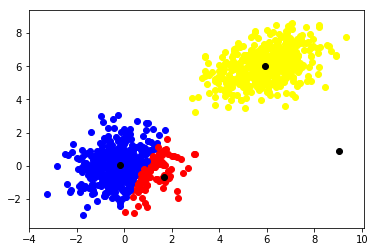

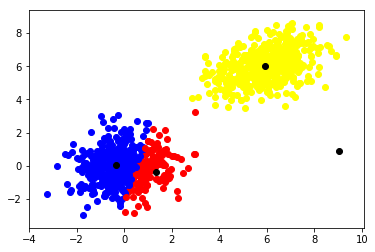

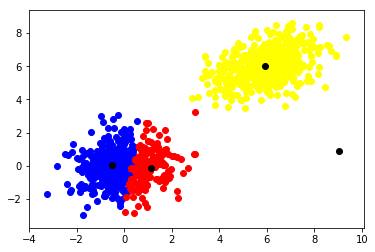

In [8]:
for idx in range(num_iters):
    plt.figure(idx)
    
    for px in range(data.shape[0]):
        dist = []
        for cx in range(k):
            d = distance(data[px],clusters[cx]['centroid'])
            dist.append(d)
        
        dist = np.array(dist)
        cluster_id = np.argmin(dist)
        clusters[cluster_id]['points'].append(data[px])
        
        plt.scatter(data[px,0],data[px,1],c=clusters[cluster_id]['color'])
     
    cx = 0
    for cx in range(k):
        plt.scatter(clusters[cx]['centroid'][0], clusters[cx]['centroid'][1], c='black')
        
        old_centroid = clusters[cx]['centroid']
        clusters[cx]['history'] = old_centroid
        
        if (len(clusters[cx]['points']) > 0):
            new_centroid = np.mean(np.array(clusters[cx]['points']), axis=0)
            clusters[cx]['centroid'] = new_centroid
        
        clusters[cx]['points'] = []
        
    plt.show()